# <center> MAIN SCRIPT </center>

______________________
<br>
<br> 
<br>

In [10]:
%run face_detection_and_recognition.py
%run upscaling.py

running install
running bdist_egg
running egg_info
writing ISR.egg-info/PKG-INFO
writing dependency_links to ISR.egg-info/dependency_links.txt
writing requirements to ISR.egg-info/requires.txt
writing top-level names to ISR.egg-info/top_level.txt
reading manifest file 'ISR.egg-info/SOURCES.txt'
writing manifest file 'ISR.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
running build_py
creating build/bdist.macosx-10.9-x86_64/egg
creating build/bdist.macosx-10.9-x86_64/egg/ISR
copying build/lib/ISR/__init__.py -> build/bdist.macosx-10.9-x86_64/egg/ISR
copying build/lib/ISR/assistant.py -> build/bdist.macosx-10.9-x86_64/egg/ISR
creating build/bdist.macosx-10.9-x86_64/egg/ISR/models
copying build/lib/ISR/models/__init__.py -> build/bdist.macosx-10.9-x86_64/egg/ISR/models
copying build/lib/ISR/models/cut_vgg19.py -> build/bdist.macosx-10.9-x86_64/egg/ISR/models
copying build/lib/ISR/models/discriminator.py -> build/bdist.macosx-10.9-x8

## <center> Image upscaling <br> <br> <br>

In [5]:
#This operation might take a few minutes to run
lr_im = Image.open('team_reduced.jpg')
sr_im = upscale(lr_im)

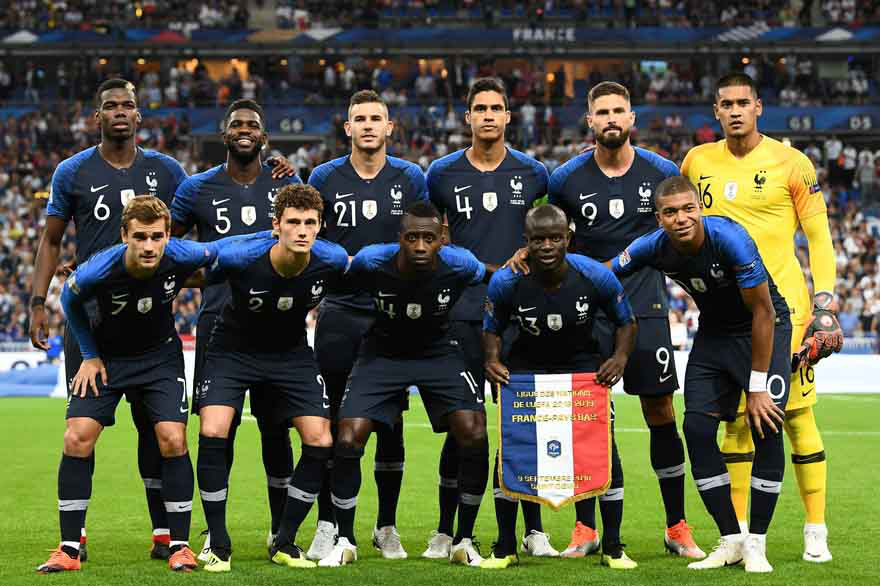

In [6]:
lr_im

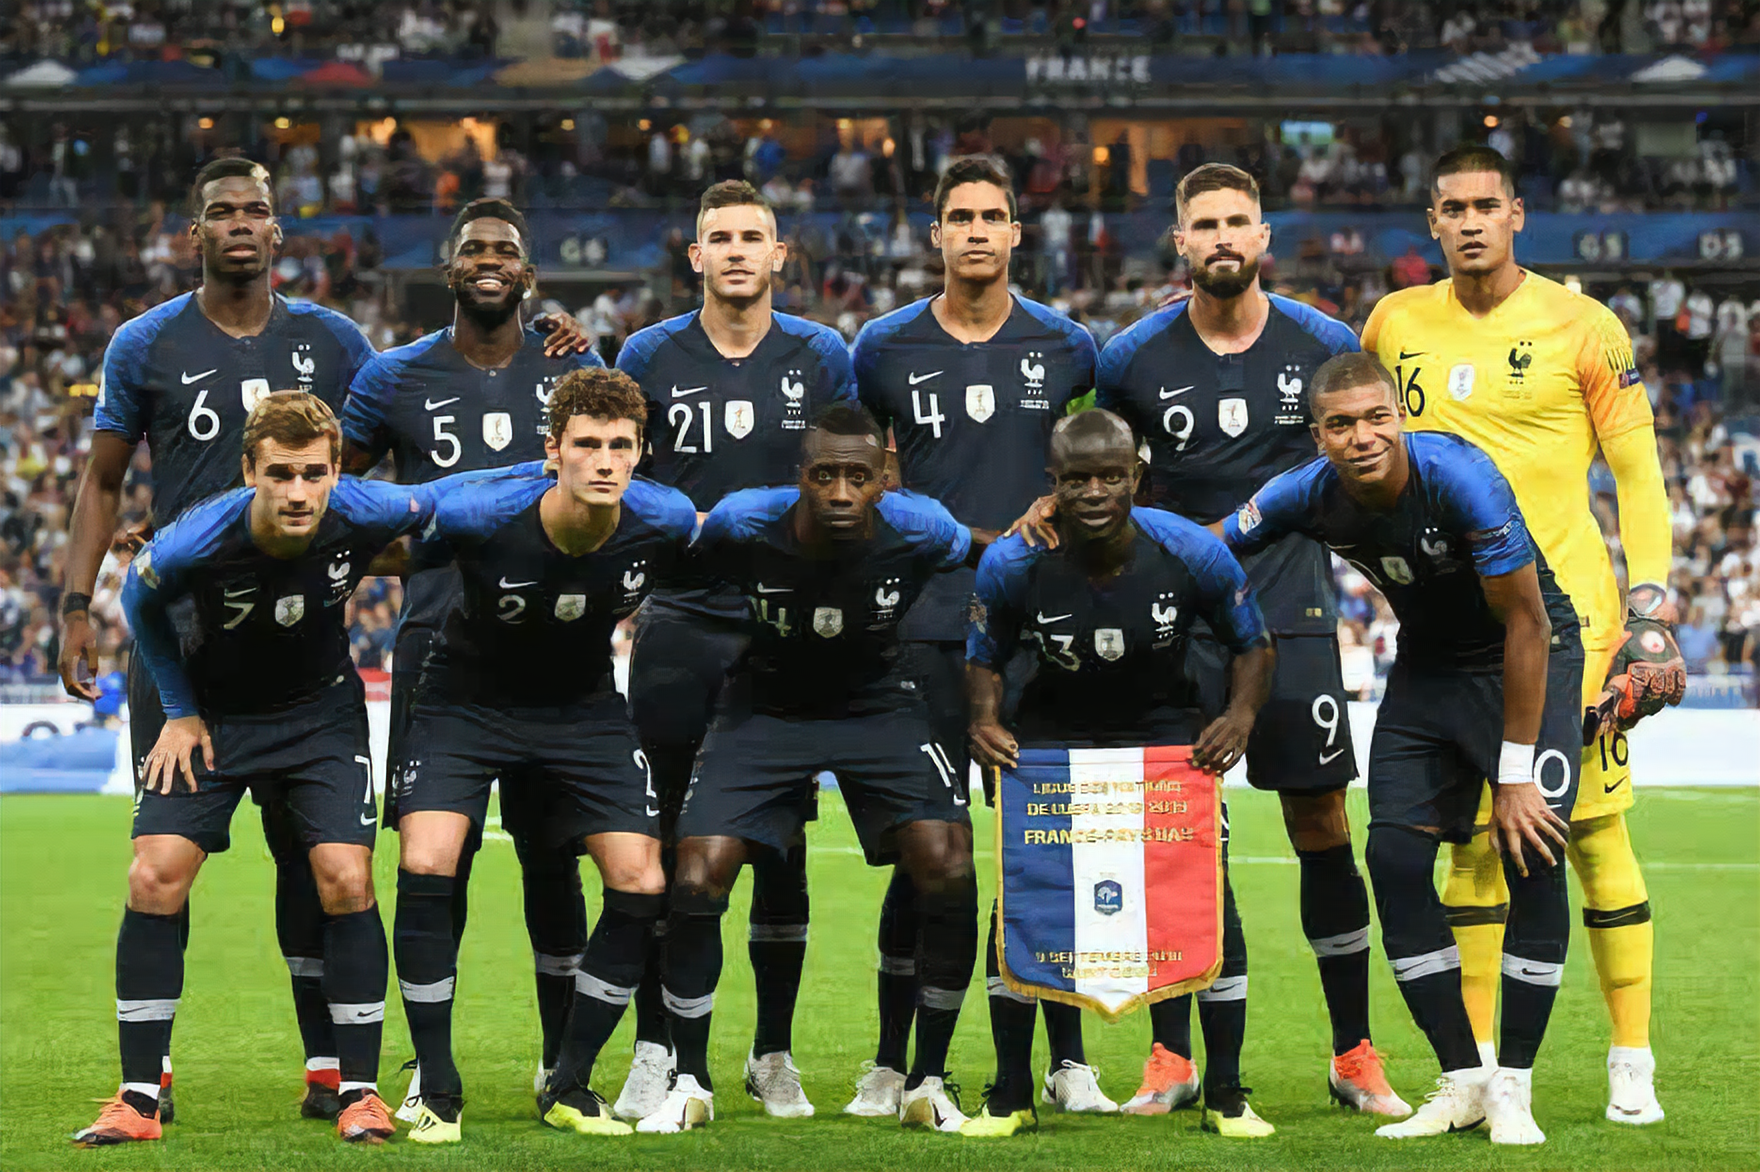

In [8]:
sr_im

## Face detection

In [11]:
class main:
    """
    This class has several methods allowing to detect the faces in a picture and 
    given a reference picture, compute the distance between every faces identified and projected into 
    an embedding space and the reference picture also projected in the embedding space"""
    
    def player_detection(self,image,im_ref = "Kylian_Mbappe.jpg"):
        self.image = image
        #face detection:
        self.faces , im_faces_squares = face_detection(image)
        
        #face extraction:
        self.faces_extracted = extract(image, self.faces)
        
        #where is the researched player:
        similarity = []
        is_player_considered = []
        
        im_ref = face_recognition.load_image_file(im_ref)
        im_ref_embeded = face_recognition.face_encodings(im_ref)[0]
        
        for i in range(len(self.faces_extracted)):
            result, simil = is_player(self.faces_extracted[i], im_ref_embeded)
            is_player_considered.append(result[0])
            similarity.append(simil[0])
        
        #return the most probable face:
        position = np.where(similarity == np.min(similarity))[0][0]
        
        return similarity[position], position
    
    def display_pred(self,image,distance,position):
        image = cv2.imread(image)            
        (x, y, w, h) = self.faces[position]
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        Image.fromarray(image).show()
        return None
        



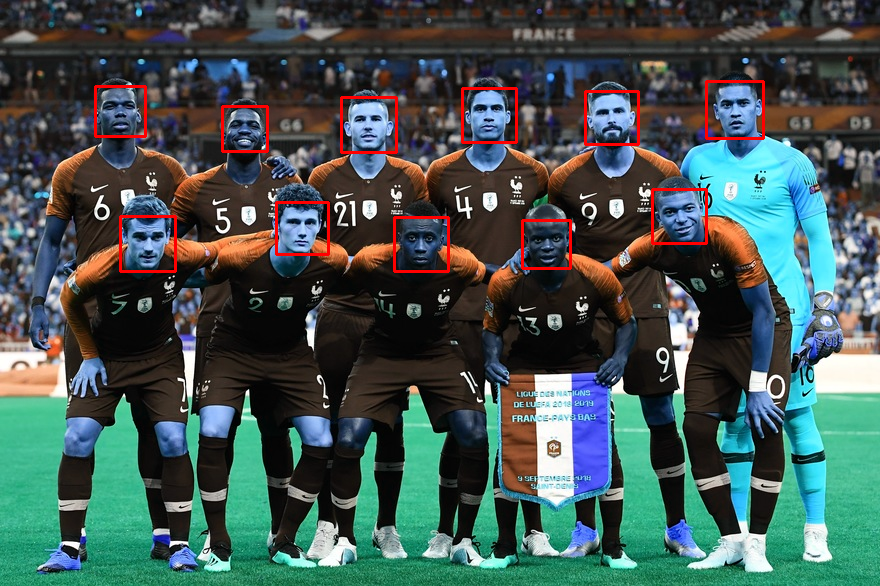

In [12]:
img = cv2.imread('team.jpg')
img_faces_detected = face_detection(img)
img_faces_detected[1]

## Face recognition

## Test on Kyllian Mbappe

In [15]:
wheres_kyllian = main()
img = cv2.imread('team.jpg')
results = wheres_kyllian.player_detection(img)
results

(0.4395609756067794, 6)

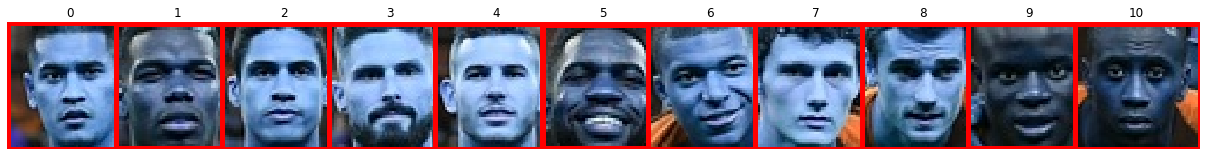

In [16]:
disp_side_by_side(wheres_kyllian.faces_extracted)

In [17]:
wheres_kyllian.display_pred('team.jpg',results[0],results[1])

## test on Benjamin Pavard:

In [18]:
wheres_pavard = main()
img = cv2.imread('team.jpg')
results = wheres_pavard.player_detection(img,'benjamin_pavard.jpg')
wheres_pavard.display_pred('team.jpg',results[0],results[1])